In [9]:
import sys
sys.path.append('../..')
from dataloader import *
from model import *
from train_eval_test import *
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
torch.manual_seed(2)

## Load data

In [11]:
ETTh1_data = pd.read_csv('../../data/ETTh1.csv', header=None).to_numpy()

In [12]:
ETTh1_data.shape

(17420, 7)

In [13]:
batch_size = 32
n_train = 8545
n_eval = 2881
n_test = 2881
train_loader, eval_loader, test_loader = get_loaders(ETTh1_data, batch_size, n_train, n_eval, n_test, T=96, S=96)

## Train

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
#writer = SummaryWriter()

cuda


In [15]:
N = 7 
T = 96 
D = 512 
S = 96 
hidden_dim = 64
num_blocks = 1 

itransformer = iTransformer(N, T, D, S, hidden_dim, num_blocks).to(device)
optimizer = torch.optim.Adam(itransformer.parameters(), lr=1e-4, weight_decay=1e-5) 


In [ ]:
loss_values, loss_eval = train(itransformer, optimizer, train_loader, eval_loader, 10, device)

## Test

In [17]:
loss_test, loss_mae, target, yhat = test(itransformer, test_loader, device)
print("MSE : ", loss_test)
print("MAE : ", loss_mae)

MSE :  0.38179343921894376
MAE :  0.40227581797675654


Affichage pour une modalité sur toute la durée de la prédiction

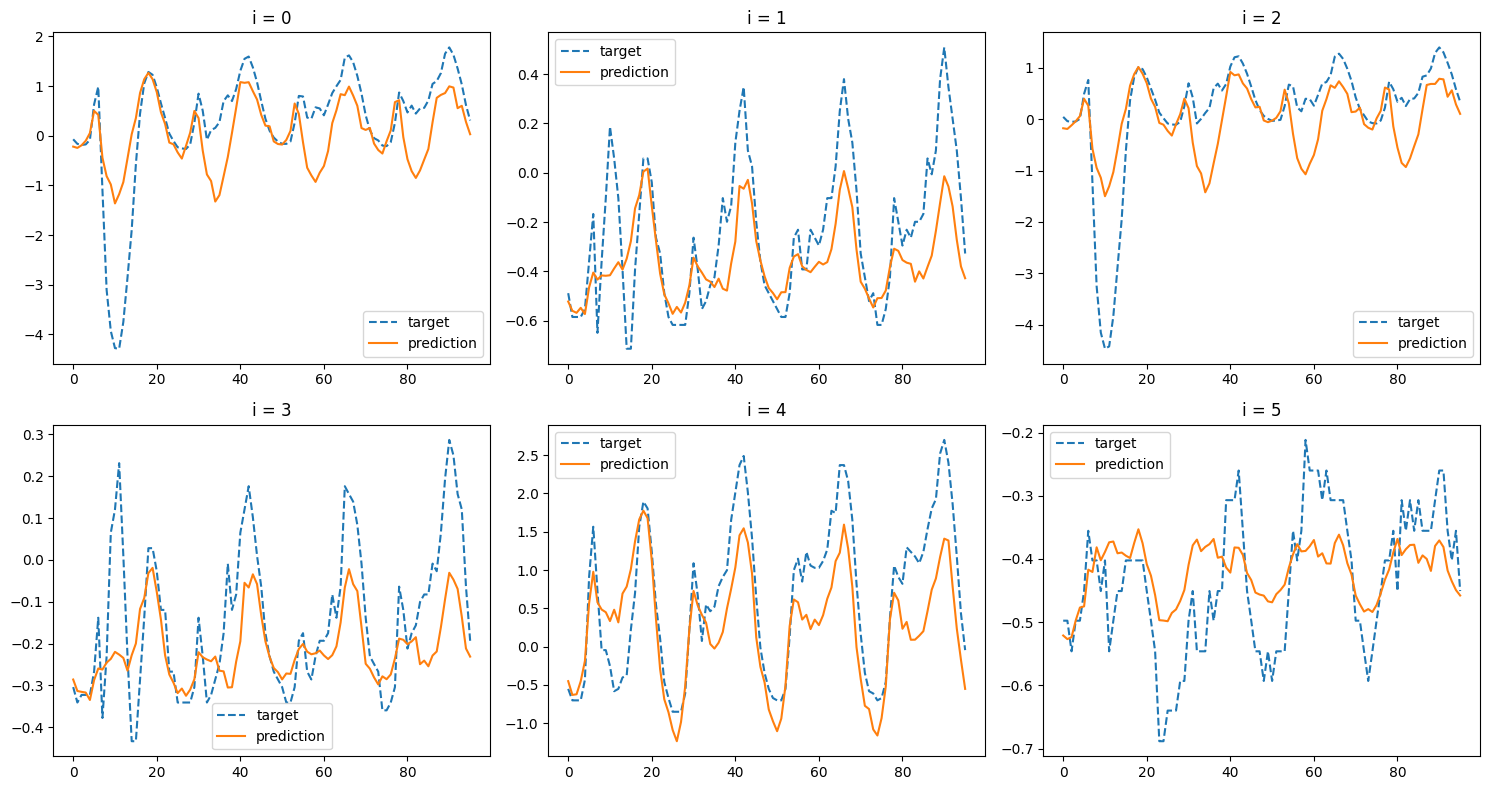

In [18]:
plt.figure(figsize=(15, 8))

for i in range(1, 7):
    plt.subplot(2, 3, i)
    current_i = i - 1
    
    plt.plot(target[0, :, current_i].to("cpu"), "--", label="target")
    plt.plot(yhat[0, :, current_i].to("cpu"), label="prediction")
    
    plt.title(f"i = {current_i}")
    plt.legend()

plt.tight_layout()
plt.show()

Affichage de toutes les modalités à un instant t

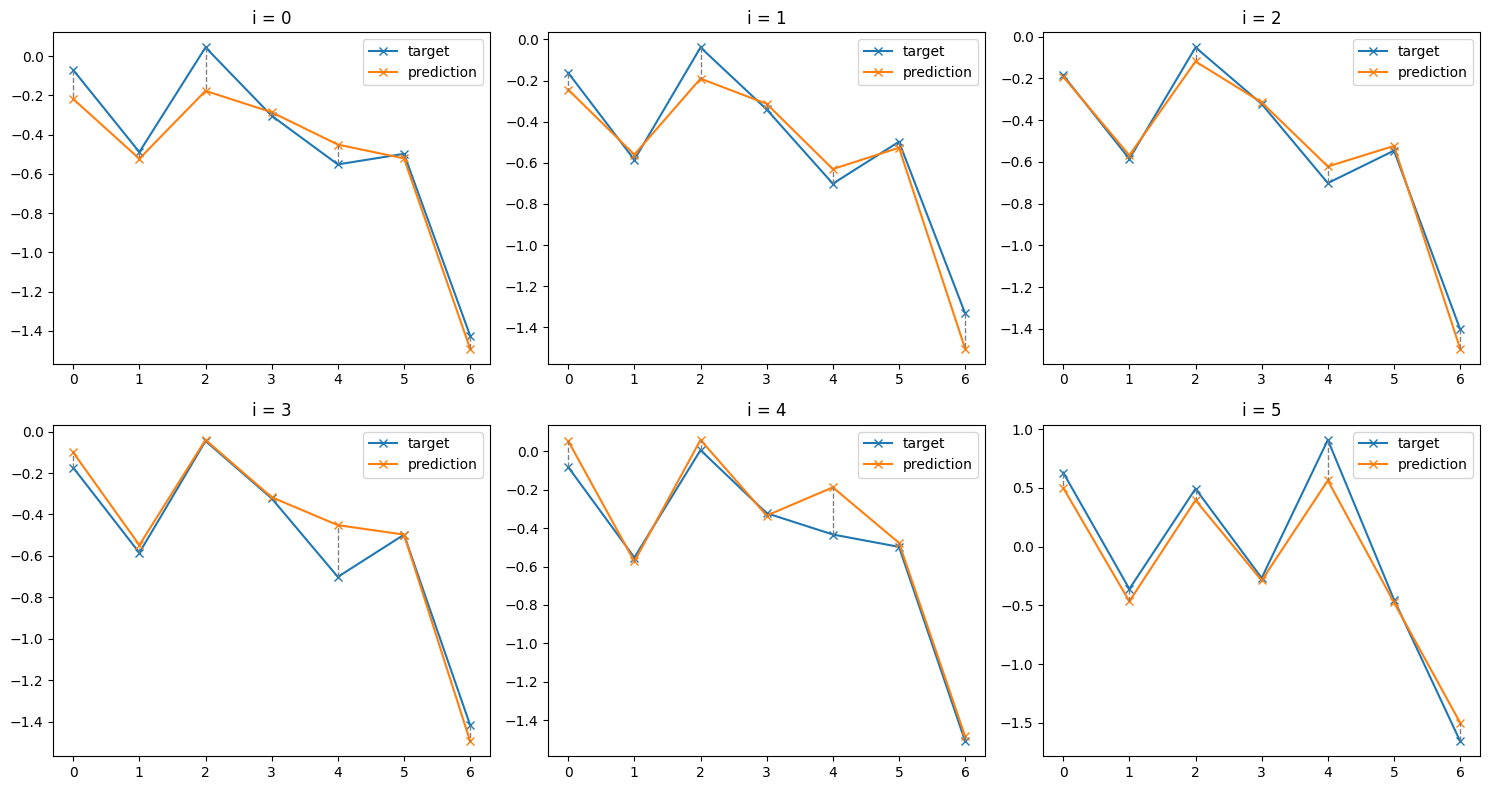

In [24]:
plt.figure(figsize=(15, 8))

for i in range(1, 7):
    plt.subplot(2, 3, i)
    
    current_i = i - 1
    
    plt.plot(np.arange(len(target[0, current_i, :7])), target[0, current_i, :20].cpu(), marker='x', label="target")
    plt.plot(np.arange(len(target[0, current_i, :7])), yhat[0, current_i, :20].cpu(), marker='x', label="prediction")

    for j in range(len(target[0, 0, :7])):
        plt.plot([j, j], [target[0, current_i, j].to("cpu"), yhat[0, current_i, j].cpu()], color='gray', linestyle='--', linewidth=1)

    plt.title(f"i = {current_i}")
    plt.legend()

plt.tight_layout()
plt.show()